#Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:

import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Importing Doge Coin Data

In [4]:
df = pd.read_csv('doge_coin.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,04/01/2020,0.002550,0.002655,0.002533,0.002630,1400000000
1,05/01/2020,0.002638,0.002639,0.002572,0.002600,1270000000
2,06/01/2020,0.002517,0.002560,0.002484,0.002546,1260000000
3,07/01/2020,0.003716,0.003793,0.002945,0.003245,7720000000
4,09/01/2020,0.009728,0.010253,0.008834,0.009753,5480000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-01,0.002550,0.002655,0.002533,0.002630,1400000000
2020-05-01,0.002638,0.002639,0.002572,0.002600,1270000000
2020-06-01,0.002517,0.002560,0.002484,0.002546,1260000000
2020-07-01,0.003716,0.003793,0.002945,0.003245,7720000000
2020-09-01,0.009728,0.010253,0.008834,0.009753,5480000000


In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [9]:
env.signal_features

array([[ 2.63000e-03,  0.00000e+00],
       [ 2.60000e-03, -3.00000e-05],
       [ 2.54600e-03, -5.40000e-05],
       [ 3.24500e-03,  6.99000e-04],
       [ 9.75300e-03,  6.50800e-03],
       [ 4.65970e-02,  3.68440e-02],
       [ 5.52610e-02,  8.66400e-03],
       [ 2.71300e-03, -5.25480e-02],
       [ 2.63900e-03, -7.40000e-05],
       [ 3.27000e-03,  6.31000e-04],
       [ 1.01580e-02,  6.88800e-03],
       [ 2.81970e-02,  1.80390e-02],
       [ 5.41350e-02,  2.59380e-02],
       [ 6.26940e-02,  8.55900e-03],
       [ 2.69700e-03, -5.99970e-02],
       [ 2.75700e-03,  6.00000e-05],
       [ 3.86300e-03,  1.10600e-03],
       [ 9.83100e-03,  5.96800e-03],
       [ 5.58810e-02,  4.60500e-02],
       [ 5.84310e-02,  2.55000e-03],
       [ 2.60400e-03, -5.58270e-02],
       [ 2.67000e-03,  6.60000e-05],
       [ 3.92500e-03,  1.25500e-03],
       [ 8.82800e-03,  4.90300e-03],
       [ 5.35300e-02,  4.47020e-02],
       [ 5.69650e-02,  3.43500e-03],
       [ 2.58500e-03, -5.43800e-02],
 

# Environment

In [10]:
env.action_space

Discrete(2)

info {'total_reward': -0.23587000000000008, 'total_profit': 43.7672830418505, 'position': 0}


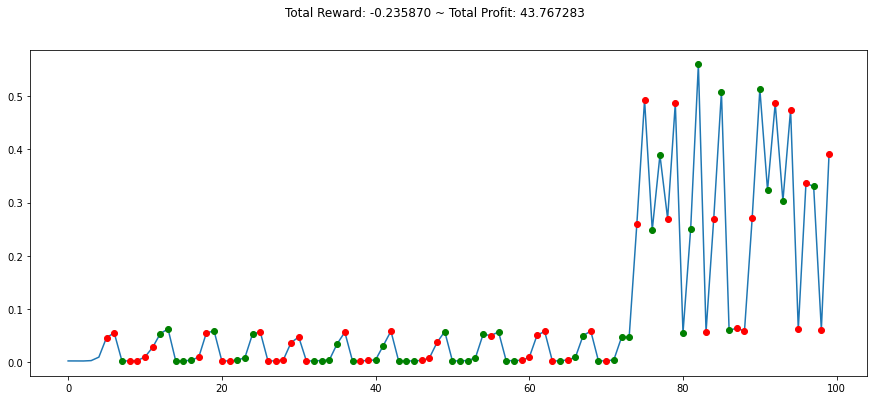

In [11]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Training Model

In [12]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

# Evaluation

In [14]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.5576659999999998, 'total_profit': 23.56724048148584, 'position': 0}


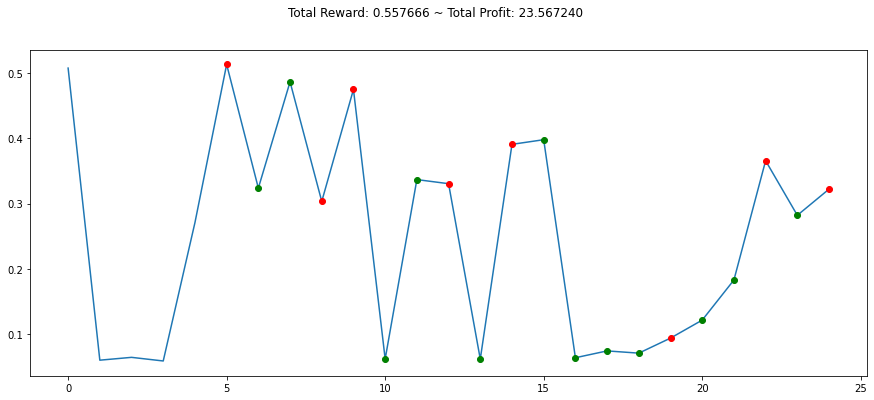

In [15]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()